# Updated 2017-10-19 Flux vs. Wavelength

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [3]:
wavelength, flux = np.genfromtxt("../data/hd23478_halpha/2017-10-19-HD23478-optimal.dat_n_vc", dtype=float, skip_header=2, usecols=(0,1), unpack=True)

Text(0.5, 1.0, '2017-10-19 : Flux vs. Wavelength')

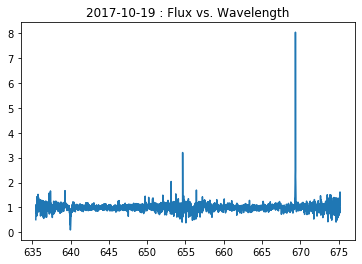

In [4]:
plt.plot(wavelength, flux)
plt.title('2017-10-19 : Flux vs. Wavelength')

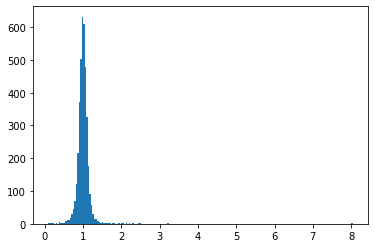

In [5]:
# Finding the histogram of the flux column from the data file.

num_bins=200

#Using flux variable from the second cell
plt.hist(flux, num_bins)
plt.show()

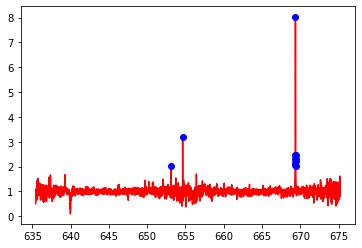

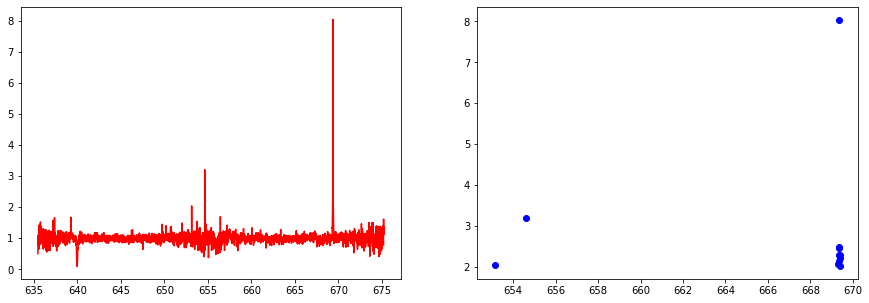

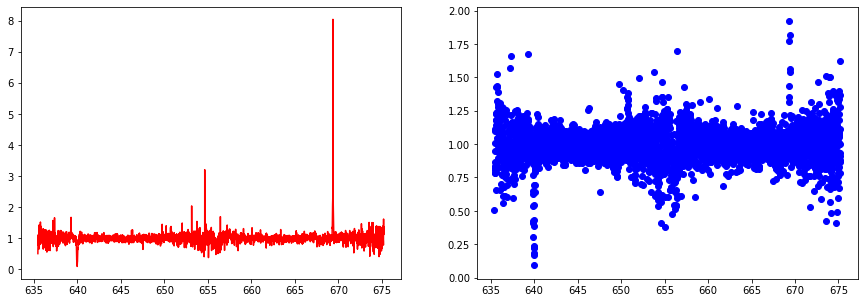

In [6]:
# Calculating the width of the histogram, also known as the standard deviation
std = np.std(flux, dtype=float)

# Calculating the median value of flux
med = np.median(flux)

# Range of 5*std from the median
add = med+(5*std) # 1.93
sub = med-(5*std) # 0.070999

# Indices for flux points within 5*std from the median
ins = np.where(np.logical_and(flux < add, flux > sub))

# Indices for flux points outside 5*std from the median
out = np.where(np.logical_or(flux > add, flux < sub))

# Scatter plot over Spectrum plot for out
fig1, ax1 = plt.subplots()
ax1.scatter(wavelength[out], flux[out], color='b', zorder=1500)
ax1.plot(wavelength, flux, color='r', zorder=1000)

# Spectrum plot on the left, Scatter plot on the right
fig1, ax2 = plt.subplots(1,2, figsize=(15, 5))
ax2[0].plot(wavelength, flux, color='r')
ax2[1].scatter(wavelength[out], flux[out], color='b')

# Test scatter plot for ins
fig1, ax3 = plt.subplots(1,2, figsize=(15, 5))
ax3[0].plot(wavelength, flux, color='r')
ax3[1].scatter(wavelength[ins], flux[ins], color='b')

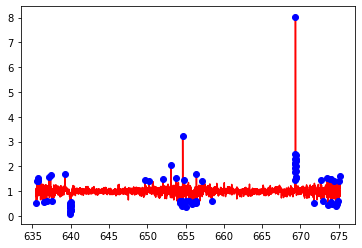

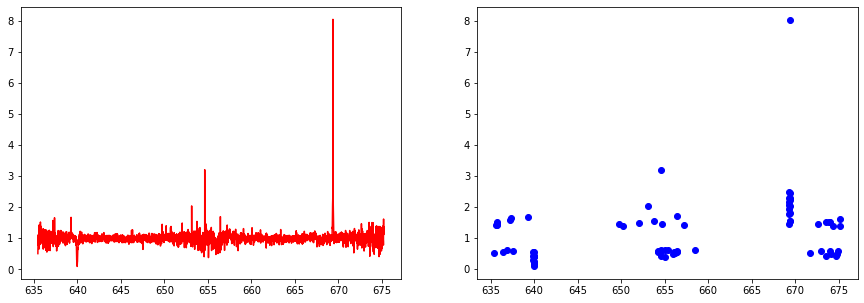

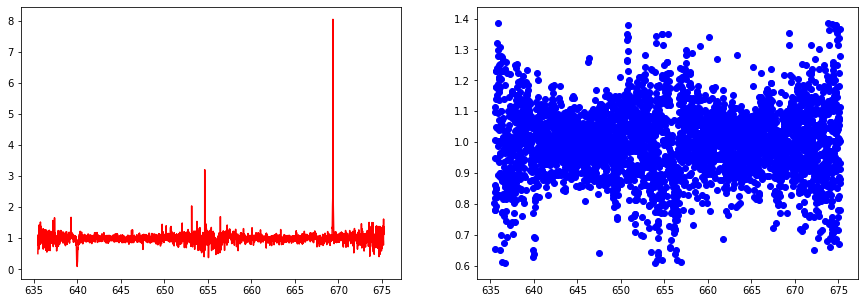

In [7]:
### Using flux[ins]

# Calculating the width/standard deviation of the histogram
std_ins = np.std(flux[ins], dtype=float)

# Calculating the median value of flux[ins]
med_ins = np.median(flux[ins])

# Range of 5*std from the med_ins
add_ins = med_ins + (3*std_ins) # 1.3932
sub_ins = med_ins - (3*std_ins) # 0.6072

# Indices for flux points within 3*std from the median
ins_w = np.where(np.logical_and(flux < add_ins, flux > sub_ins))

# Indices for flux points outside 3*std from the median
out_w = np.where(np.logical_or(flux > add_ins, flux < sub_ins))

# Scatter plot over Spectrum plot for out_w
fig2, axe1 = plt.subplots()
axe1.scatter(wavelength[out_w], flux[out_w], color='b', zorder=1500)
axe1.plot(wavelength, flux, color='r', zorder=1000)

# Spectrum plot on the left, Scatter plot on the right
fig2, axe2 = plt.subplots(1,2, figsize=(15, 5))
axe2[0].plot(wavelength, flux, color='r')
axe2[1].scatter(wavelength[out_w], flux[out_w], color='b')

# Test scatter plot for ins_w
fig2, axe3 = plt.subplots(1,2, figsize=(15, 5))
axe3[0].plot(wavelength, flux, color='r')
axe3[1].scatter(wavelength[ins_w], flux[ins_w], color='b')

In [9]:
# Final standard deviation based on ins_w (excluding all the outliers from the initial ins)
std_fin = np.std(flux[ins_w])

# Signal to Noise Ratio (mean over the standard deviation)
snr = 1 / std_fin
snr

9.096760411791236